In [1]:
from pytriqs.plot.mpl_interface import *
%matplotlib inline
# change scale of all figures to make them bigger
import matplotlib as mpl
mpl.rcParams['savefig.dpi']=100 

HDF5 Archives
=============

An important issue when it comes to numerical calculations is to save data in a compact, portable and light way, which allows for easy recovery. To this end, the objects in TRIQS
are save into hdf5 archives. The interface in TRIQS allows
to recover objects directly, as they were saved. Let us first import the relevant module:

In [2]:
from pytriqs.archive import HDFArchive

Writing in an archive
---------------------

We open a new archive from scratch

In [3]:
A = HDFArchive("my_archive.h5",'w')

The `'w'` here means we overwrite the archive if there was an existing one. If you want to append information to an
existing archive without destroying it, use `'a'`. An archive essentially behaves like a python dictionary, i.e. we can
put any object in there

In [4]:
from pytriqs.gf import *
g = GfReFreq(indices=[0], window=[-2,2], name='GF')
g << SemiCircular(1.0)

with HDFArchive("my_archive.h5",'w') as A:
    A['number'] = 12
    A['GF'] = g

From the shell we can now see the new file and check what is
in it

In [5]:
!ls *.h5

my_archive.h5


In [6]:
!h5ls my_archive.h5

GF                       Group
number                   Dataset {SCALAR}


Note: The `!` allows to run shell commands from the notebook. `h5ls` is a command that lists the entries in an archive.

Reading from an archive
-----------------------

Of course, later on we want to read from our saved archive.
We just open it again (the `'r'` flags means that we just read from the archive and
cannot modify it)

HDFArchive (partial view) with the following content:
  GF : subgroup
  number : data 
Number =  12


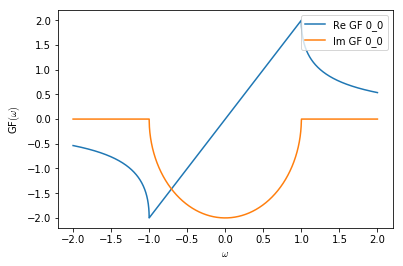

In [7]:
with HDFArchive("my_archive.h5",'r') as B:
    # show the contents of the archive
    print B
    # reconstruct the object number from B
    print "Number = ", B['number']
    # reconstruct and plot the Green's function
    oplot(B['GF'], name = 'GF')